In [2]:
%pip install ipywidgets

     -------------------------------------- 137.9/137.9 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 16.2 MB/s eta 0:00:00
     ------------------------------------- 384.3/384.3 kB 24.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install torch torchvision torchaudio

  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Jason\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

  Cloning https://github.com/huggingface/diffusers.git to c:\users\jason\appdata\local\temp\pip-req-build-1vg2pz5d
  Resolved https://github.com/huggingface/diffusers.git to commit c3b2f97534d2f2cd019a3fd2e7b70bcd21958963
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached accelerate-0.15.0-py3-none-any.whl (191 kB)
     -------------------------------------- 268.0/268.0 kB 4.2 MB/s eta 0:00:00
  Using cached filelock-3.8.2-py3-none-any.whl (10 kB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
     ---------------------------------------- 153.2/153.2 kB ? eta 0:00:00
     ---------------------------------------- 3.3/3.3 

  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git 'C:\Users\Jason\AppData\Local\Temp\pip-req-build-1vg2pz5d'

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Windows Below

In [1]:
%pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
torch.cuda.is_available()

c:\Users\Jason\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [16]:
## Windows Below
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

pipe.safety_checker=None

pipe.enable_attention_slicing()

Fetching 12 files: 100%|██████████| 12/12 [00:00<00:00, 11992.29it/s]


## Generate the photo


In [17]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]


100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


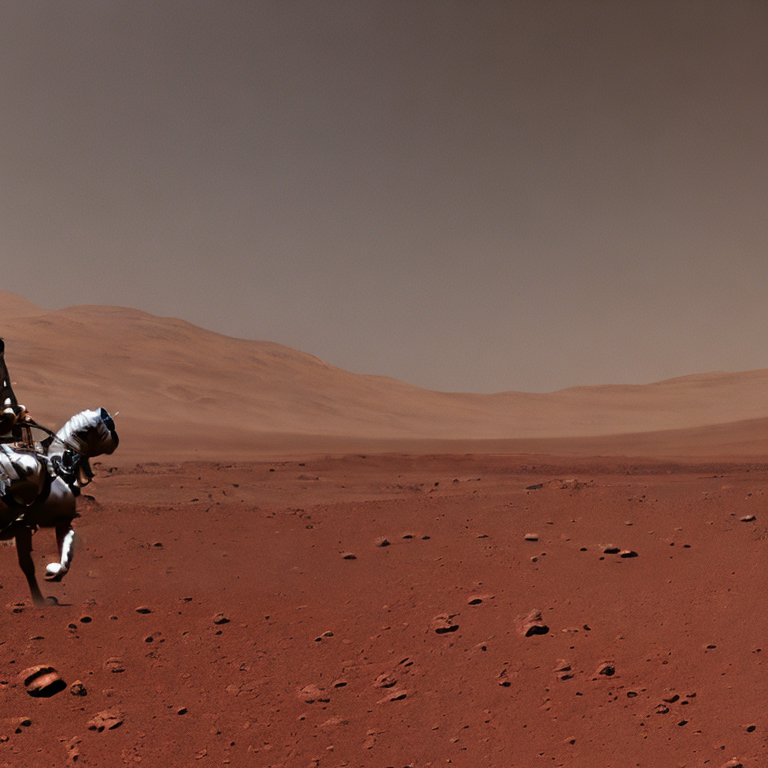

In [18]:
image

## MACOS Below

In [1]:
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("mps")

pipe.safety_checker=None

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 3.44G/3.44G [01:48<00:00, 31.7MB/s]
Downloading: 100%|██████████| 547/547 [00:00<00:00, 90.0kB/s]s/it]
Downloading: 100%|██████████| 335M/335M [00:09<00:00, 35.9MB/s]it]
100%|██████████| 1/1 [00:15<00:00, 15.33s/it]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 50/50 [05:48<00:00,  6.96s/it]


In [3]:
prompt = "jesus christ getting hit by a japanese truck in ancient rome"

# First-time "warmup" pass (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt).images[0]
image

100%|██████████| 1/1 [00:08<00:00,  8.76s/it]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
 94%|█████████▍| 47/50 [05:39<00:19,  6.48s/it]